## Linear Regression - Project Exercise

Congratulations! We just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired Us on contract to help them figure it out! Let's get started!


## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline (You'll import sklearn as you need it.)**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics


## Get the Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

​

In [99]:
customers = pd.read_csv('E:\Purwadhika\Materi\Module-03-Python for Machine Learning\Project  Practices\Linear Regression\Ecommerce Customers')

In [100]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [101]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [102]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [103]:
customers.shape

(500, 8)

#### Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.(Don't worry about the the colors)

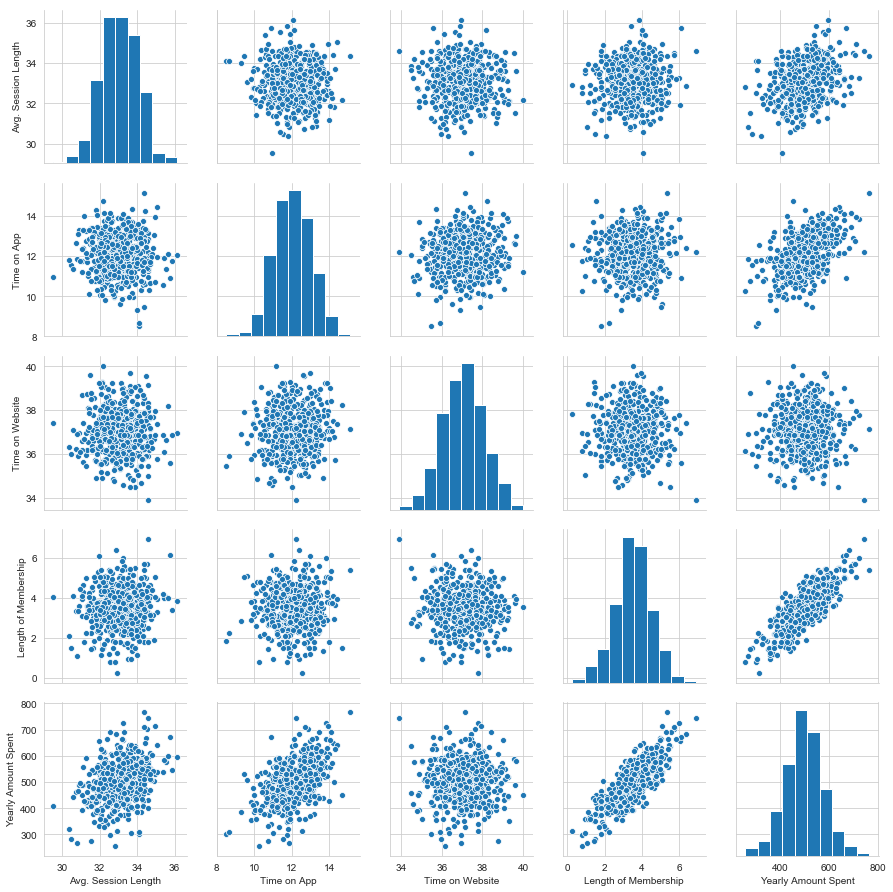

In [104]:
sns.set_style("whitegrid")
sns.pairplot(customers)

*Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership. *

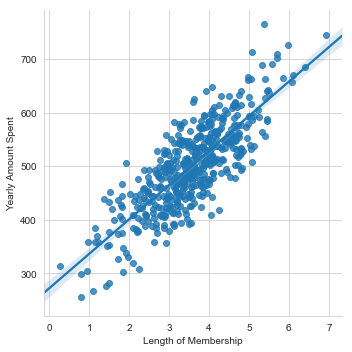

In [105]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data = customers)

In [106]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. ** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [107]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [108]:
y =customers['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 101)

** Train/fit lm on the training data.**

In [110]:
lm = LinearRegression()

In [111]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [113]:
predict = lm.predict(X_test)

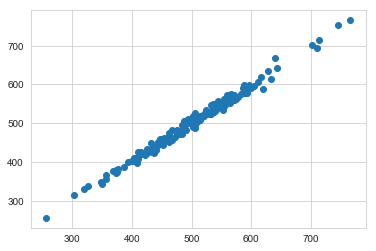

In [114]:
plt.scatter(y_test,predict)

## Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

​

In [115]:
MAE = metrics.mean_absolute_error(y_test, predict)
MSE = metrics.mean_squared_error(y_test, predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predict))

In [116]:
print('MAE :',MAE)
print('MSE :',MSE)
print('RMSE: ',RMSE)

MAE : 7.228148653430815
MSE : 79.81305165097429
RMSE:  8.933815066978624


## Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

C:\Users\Yeheskia-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


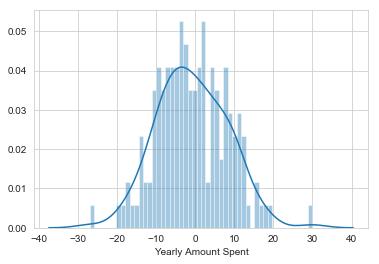

In [117]:
sns.distplot((y_test-predict), bins =50)

(array([ 1.,  5., 15., 34., 36., 27., 25.,  5.,  1.,  1.]),
 array([-26.95573072, -21.26030045, -15.56487019,  -9.86943992,
         -4.17400966,   1.5214206 ,   7.21685087,  12.91228113,
         18.6077114 ,  24.30314166,  29.99857192]),
 <a list of 10 Patch objects>)

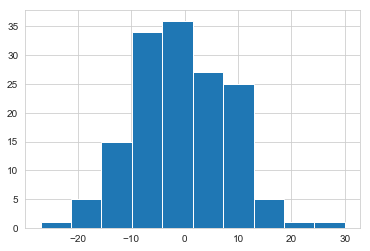

In [118]:
plt.hist(y_test-predict)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [119]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Interpreting the Coefficient:

From the Coefficient clearly Time on App is higher than on Website

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.590159 Yearly Amount Spent

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.190405 Yearly Amount Spent

### Sugestion:
### The Company should consider to Focus on built Mobile App rather than their website

In [120]:
customers['Time on App'].sum()

6026.243968583066

In [121]:
customers['Time on Website'].sum()

18530.222710474292

In [122]:
customers['Time on App'].mean()

12.052487937166134

In [123]:
customers['Time on Website'].mean()

37.06044542094859